In [25]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:/Users/ADMIN/Desktop/python jupyter/PROJECTS/Customer Churn Prediction/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [9]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [11]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [12]:
df['Geography_Germany'] = df['Geography_Germany'].replace({False: 0, True: 1})
df['Geography_Spain'] = df['Geography_Spain'].replace({False: 0, True: 1})
df['Gender_Male'] = df['Gender_Male'].replace({False: 0, True: 1})

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8236\1710579153.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography_Germany'] = df['Geography_Germany'].replace({False: 0, True: 1})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8236\1710579153.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Geography_Spain'] = df['Geography_Spain'].replace({False: 0, True: 1})
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_8236\1710579153.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a futu

In [13]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [14]:
X = df.drop('Exited',axis=1)
Y = df['Exited']

In [15]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [70]:
history = model.fit(X_train_scaled,Y_train,epochs=60,validation_split=0.2)

Epoch 1/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8630 - loss: 0.3343 - val_accuracy: 0.8587 - val_loss: 0.3408
Epoch 2/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8618 - loss: 0.3321 - val_accuracy: 0.8569 - val_loss: 0.3400
Epoch 3/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8642 - loss: 0.3250 - val_accuracy: 0.8556 - val_loss: 0.3431
Epoch 4/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8674 - loss: 0.3260 - val_accuracy: 0.8581 - val_loss: 0.3406
Epoch 5/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8638 - loss: 0.3306 - val_accuracy: 0.8562 - val_loss: 0.3399
Epoch 6/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8712 - loss: 0.3267 - val_accuracy: 0.8581 - val_loss: 0.3398
Epoch 7/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8538 - loss: 0.3378 - val_accuracy: 0.8562 - val_loss: 0.3398
Epoch 8/60
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8654 - loss: 0.3249 - val_accuracy: 0.

In [71]:
model.layers[0].get_weights() # 33 weights and 3 biases

[array([[-2.67241485e-02, -1.83524162e-01, -2.43092757e-02,
         -5.22365868e-02,  1.63868800e-01, -7.67725566e-03,
          2.24005714e-01, -2.27831886e-03, -2.61058092e-01,
         -3.31401736e-01, -8.93657058e-02],
        [ 3.62072438e-01,  7.85745621e-01, -1.34818721e+00,
         -7.26209700e-01,  5.23639955e-02, -2.88580090e-01,
         -2.57232159e-01,  6.78577065e-01, -5.72091758e-01,
          6.08991921e-01, -3.08459491e-01],
        [-5.85658476e-03,  1.17474198e-01,  6.85953498e-02,
          1.25685036e-01,  1.49773464e-01, -1.92283675e-01,
         -2.02089116e-01,  1.02931157e-01, -1.25449687e-01,
         -4.40657251e-02,  2.06834674e-01],
        [ 2.83080786e-01, -1.78826153e-01,  8.04179981e-02,
          1.02817379e-01,  1.56235412e-01, -1.65085211e-01,
         -2.96902180e-01,  3.09550196e-01,  1.57146797e-01,
         -3.13738227e-01,  1.48352370e-01],
        [ 1.08219171e+00,  6.68084681e-01, -1.99773327e-01,
          2.44172409e-01, -7.53879368e-01,  

In [72]:
model.layers[1].get_weights() # 3 weights and 1 biases

[array([[-0.4927538 , -0.46592703, -0.44099888, -0.06915174,  0.83738065,
          0.9345455 ,  0.92602414, -0.27927494, -1.0957491 , -0.22668298,
          1.0793707 ],
        [ 0.4799968 , -0.2210399 ,  0.44212714,  0.4933416 , -0.40130544,
         -0.42526016, -0.30179027,  0.38484722, -3.2711387 , -0.52798456,
         -0.13109097],
        [-0.0986759 , -0.30397114,  0.23856576,  0.07755829, -0.664118  ,
          0.21125315, -0.26473156,  0.35600525,  0.10258501, -0.5181349 ,
         -0.59571236],
        [ 0.24422902, -0.8941369 ,  0.2236605 ,  0.540128  , -0.7897515 ,
          0.27972043, -0.258879  ,  0.03695509,  0.58090115,  0.39481714,
          0.392786  ],
        [ 0.04794856, -0.02746096, -0.3119889 , -0.37055737,  0.540698  ,
         -0.59505713, -0.26726237, -0.24684328, -0.6610662 , -0.16983023,
         -0.16787097],
        [ 0.738192  , -0.3935824 , -0.2982624 ,  0.5324338 , -0.07302497,
         -0.36754656,  0.34761772,  0.3282941 ,  0.6142334 ,  0.0975589

In [73]:
Y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [74]:
Y_pred = np.where(Y_log>0.5,1,0)
Y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [75]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.8595

In [76]:
history.history['loss']

[0.3293253779411316,
 0.3292476236820221,
 0.32926246523857117,
 0.3287431597709656,
 0.32902446389198303,
 0.32838183641433716,
 0.32896673679351807,
 0.32821139693260193,
 0.32827702164649963,
 0.32847878336906433,
 0.3287471532821655,
 0.32792559266090393,
 0.3279522657394409,
 0.3274015486240387,
 0.32733675837516785,
 0.32713839411735535,
 0.3273542523384094,
 0.3270876407623291,
 0.32717323303222656,
 0.3264104723930359,
 0.3267990052700043,
 0.3264058232307434,
 0.3268614709377289,
 0.32614898681640625,
 0.32666081190109253,
 0.3262900412082672,
 0.32565176486968994,
 0.3263698220252991,
 0.3262176215648651,
 0.32596656680107117,
 0.32577189803123474,
 0.32576289772987366,
 0.325490802526474,
 0.3254653811454773,
 0.3255217373371124,
 0.32540443539619446,
 0.3257271647453308,
 0.32541751861572266,
 0.32503950595855713,
 0.32506904006004333,
 0.3247973918914795,
 0.32472744584083557,
 0.32457488775253296,
 0.3248146176338196,
 0.324964702129364,
 0.32488974928855896,
 0.324851214

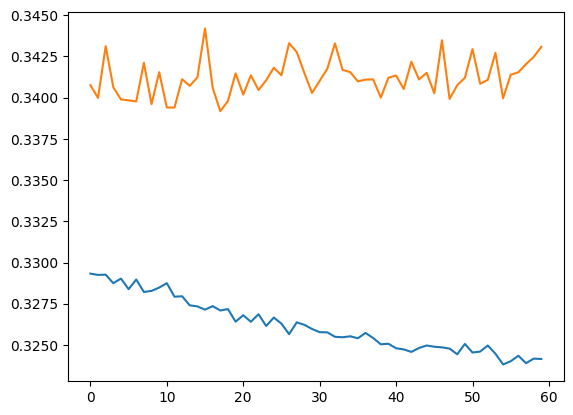

In [77]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

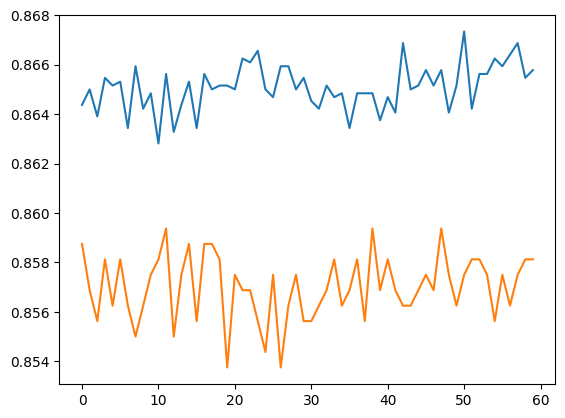

In [78]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])